In [66]:
# !pip install pydot
# from sklearn.tree import export_graphviz
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt

In [9]:
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [55]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

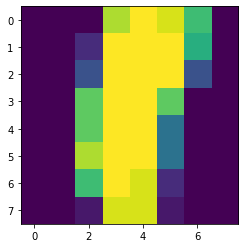

In [56]:
plt.imshow(X_tr[0].reshape((8, 8)))

In [57]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
clf.fit(X_tr, y_tr)
clf.score(X_test, y_test)

0.8222222222222222

In [59]:
tree = DecisionTreeClassifier()
search = RandomizedSearchCV(tree, 
                            {'criterion' : ['gini', 'entropy'], 
                             'max_depth' : range(2, 10), 
                             'min_samples_split' : range(2, 10)},
                            cv=10,
                            scoring='accuracy')

In [60]:
search.fit(X_tr, y_tr)
print(search.best_params_)
print(search.best_score_)
t = search.best_estimator_
t.score(X_test, y_test)

{'min_samples_split': 6, 'max_depth': 7, 'criterion': 'entropy'}
0.8420320111343076


C:\Users\gpu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8416666666666667

<BarContainer object of 64 artists>

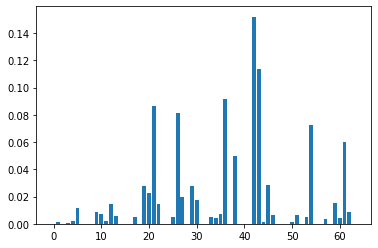

In [61]:
imp = t.feature_importances_
plt.bar(range(len(imp)), imp)

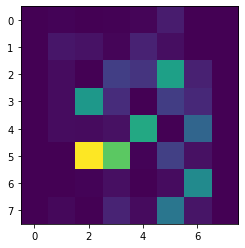

In [63]:
plt.imshow(imp.reshape((8, 8)))

In [68]:
forest = RandomForestClassifier()
search1 = RandomizedSearchCV(forest, 
                            {'criterion' : ['gini', 'entropy'], 
                             'max_depth' : range(2, 10), 
                             'min_samples_split' : range(2, 10),
                             'n_estimators' : range(10, 100)},
                            cv=10,
                            scoring='accuracy')
search1.fit(X_tr, y_tr)
print(search1.best_params_)
print(search1.best_score_)
fr = search1.best_estimator_
fr.score(X_test, y_test)

{'n_estimators': 60, 'min_samples_split': 4, 'max_depth': 9, 'criterion': 'gini'}
0.9791231732776617


C:\Users\gpu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.9555555555555556

<BarContainer object of 64 artists>

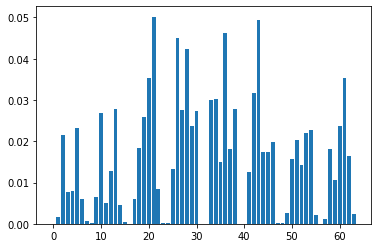

In [69]:
imp1 = fr.feature_importances_
plt.bar(range(len(imp1)), imp1)

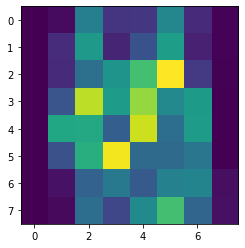

In [70]:
plt.imshow(imp1.reshape((8, 8)))